<a href="https://colab.research.google.com/github/NEMERO21/Sampling-Assignment/blob/main/Sampling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
dataset_df = pd.read_csv('/content/Creditcard_data.csv')
dataset_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: title={'center': 'Distribution'}, xlabel='Class', ylabel='Frequency'>

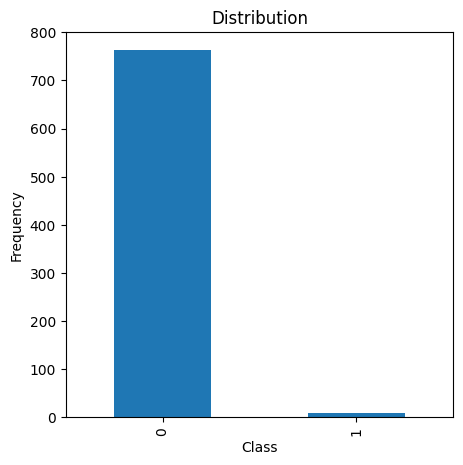

In [3]:
plt.figure(figsize = (5,5))
plt.title('Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
dataset_df['Class'].value_counts().plot(kind = 'bar')

In [4]:
X = dataset_df.drop('Class', axis = 1)
y = dataset_df['Class']

In [39]:
sampler = RandomUnderSampler(sampling_strategy = 0.6, random_state = 42)
X_resampled, y_resampled = sampler.fit_resample(X,y)

In [17]:
sample_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

In [27]:
sampling_techniques = [
    RandomOverSampler(random_state = 42),
    SMOTE(random_state = 42),
    RandomUnderSampler(random_state = 42),
    NearMiss(version = 1, n_neighbors = 5),
    TomekLinks()
]

In [22]:
models = [
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    GaussianNB()
]

In [40]:
results = []

for i, (sampler, model) in enumerate(zip(sampling_techniques, models)):
    technique_results = []

    for size in sample_sizes:

        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=size, random_state=42)


        X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)


        model.fit(X_train_sampled, y_train_sampled)


        y_pred = model.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)
        technique_results.append(accuracy)

    results.append(technique_results)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [46]:
model_names = ["RandomForest", "SVM", "DecisionTree", "LogisticRegression", "GaussianNB"]
technique_names = ["RandomOverSampler", "SMOTE", "RandomUnderSampler", "NearMiss", "TomekLinks"]

result_df = pd.DataFrame(columns=technique_names, index=model_names)

for i, technique_results in enumerate(results):
    for j, accuracy in enumerate(technique_results):
        result_df.at[model_names[j], technique_names[i]] = accuracy

print(result_df)

                   RandomOverSampler     SMOTE RandomUnderSampler  NearMiss  \
RandomForest                     1.0  0.666667           0.666667  0.666667   
SVM                              1.0       0.8                0.8       0.8   
DecisionTree                    0.75      0.75              0.625     0.625   
LogisticRegression               0.7       0.8                0.7       0.6   
GaussianNB                  0.583333      0.75               0.75  0.583333   

                   TomekLinks  
RandomForest         0.666667  
SVM                       0.6  
DecisionTree            0.125  
LogisticRegression        0.6  
GaussianNB               0.75  


In [49]:
results_df = result_df.apply(pd.to_numeric, errors='coerce')

max_accuracy_indices = results_df.idxmax(axis = 0)

print("\nBest Sampling Techniques for Each Model:")
for model, technique in max_accuracy_indices.items():
  print(f"{model} : {technique}")


Best Sampling Techniques for Each Model:
RandomOverSampler : RandomForest
SMOTE : SVM
RandomUnderSampler : SVM
NearMiss : SVM
TomekLinks : GaussianNB


In [54]:
#Command to install tabluate library: !pip install tabulate
from tabulate import tabulate
print("\n Tabular Form: ")
print(tabulate(results_df*100, headers = 'keys', tablefmt = 'pretty'))


 Tabular Form: 
+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+
|                    | RandomOverSampler  |       SMOTE       | RandomUnderSampler |      NearMiss      |    TomekLinks     |
+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+
|    RandomForest    |       100.0        | 66.66666666666666 | 66.66666666666666  | 66.66666666666666  | 66.66666666666666 |
|        SVM         |       100.0        |       80.0        |        80.0        |        80.0        |       60.0        |
|    DecisionTree    |        75.0        |       75.0        |        62.5        |        62.5        |       12.5        |
| LogisticRegression |        70.0        |       80.0        |        70.0        |        60.0        |       60.0        |
|     GaussianNB     | 58.333333333333336 |       75.0        |        75.0        | 58.3333333333333